# Srečanja

Dva tipa. Bluzita po New Yorku, v času viška korone. Zelo pametno. No, vsaj sledilno aplikacijo sta imela. Vsaj to.

<table width="100%"><tr>
    <td align="center"><font size="2">Prvi je šel tako:<br/>^2 &gt;6 ^6 &lt;1 v3 &lt;6 v4</font></td>
    <td align="center"><font size="2">Drugi - tako:<br/>&gt;4 ^3 &gt;4 ^3 &lt;6 v8 &gt;1 ^5</font></td>
    <td align="center"><font size="2">Če narišemo oba skupaj, je to videti tako.</font></td>
</tr>
<tr><td align="center">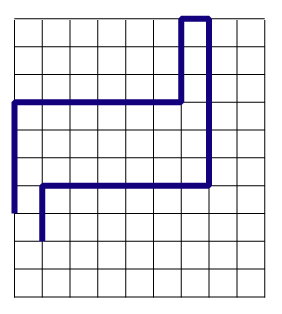
</td><td align="center">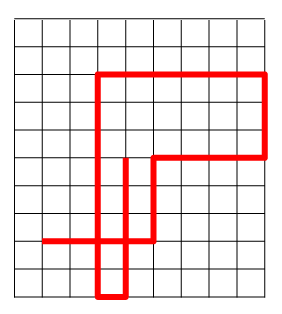
</td><td align="center">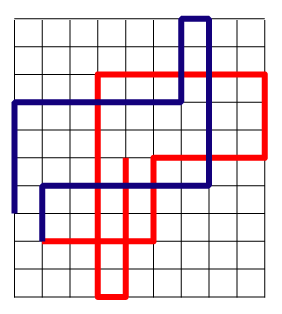
</td>
</tr></table>


Vse ulice so pravokotne, vse razdalje so pozitivna cela števila. (Ker Manhattan.)

Aplikacija za sledenje je zaznala, da sta se vsaj enkrat srečala. *Fun fact*: nikoli nista šla po isti poti: njune poti so se le križale. *Less fun fact*: aplikacija ne beleži ne koordinat ne časa, zato nimamo pojma, kje sta se srečala.

## Testi


[testi-srecanja.py](https://cdn.jsdelivr.net/gh/janezd/predavanja@master/p1/domace-naloge/2020/07%20srečanja/testi.py)


## Obvezni del

- Za začetek napiši funkcijo `v_pot(s)`, ki prejme niz, kot so gornji, in ga razbije v seznam terk: prvi element terke je smer, drugi razdalja. Klic `v_pot(">100 ^42 <13")` vrne `[(">", 100), ("^", 42), ("<", 13)]`.

- Napiši funkcijo `odsek(x, y, smer, razdalja)`, ki prejme (celoštevilski) koordinati `(x, y)`, smer (`"<"`, `">"`, `"^"` ali `"v"`) in dolžino odseka (pozitivno celo število). Vrniti mora seznam terk, ki predstavljajo vse celoštevilske koordinate na tem odseku. Klic `odsek(2, 5, "^", 3)` vrne `[(2, 5), (2, 6), (2, 7), (2, 8)]`.

- Nato napiši funkcijo `tocke(s)`, ki prejme gornji seznam terk in sestavi seznam vseh celoštevilskih koordinat, prek katerih gre pot. Klic `tocke([(">", 3), ("v", 2), (">", 2)])` vrne `[(0, 0), (1, 0), (2, 0), (3, 0), (3, -1), (3, -2), (4, -2), (5, -2)]`. Pot se vedno začne na koordinatah `(0, 0)`.

- Končno, napiši funkcijo `presecisca(s, t)`, ki prejme dve poti *kot niz* in vrne seznam njunih presečišč, torej vseh točk potencialnih srečanj teh dveh ljudi. Upoštevaj, da so črte lahko tudi zelo dolge, veliko daljše kot v tem primeru. (Spet pa ne tako dolge, da seznam koordinat ne bi šel v pomnilnik.) Funkcija mora delo vseeno opraviti v nekaj sekundah. Če bo zahtevala več časa, ni pravilno napisana. (Ne boj se: če bo počasna, bo *res* počasna in boš vedel(a), da ni OK.)

### Rešitev

#### Funkcija `pot`

Niz je potrebno razbiti na seznam nizov, kot je, na primer `"^12"`, nato pa iti prek tega razbitja ter njegove elemente predelati v terke in zlagati v seznam.

In [1]:
def v_pot(s):
    pot = []
    for korak in s.split():
        smer, razdalja = korak[0], int(korak[1:])
        pot.append((smer, razdalja))
    return pot

v_pot(">100 ^42 <13")

[('>', 100), ('^', 42), ('<', 13)]

`smer` je prvi znak koraka (`korak[0]`) in `razdalja` je vse *razen* prvega znaka (`korak[1:]`), kar je potem potrebno pretvoriti še v `int`.
Vrstici znotraj zanke bi seveda lahko združili v eno, `pot.append((korak[0], int(korak[1:])))`, vendar se mi zdi informativno poimenovati stvari, ki jih dajemo v seznam.

#### Funkcija `odsek`

Tole je nekaj, kar sem pogosto videval v študentskih rešitvah.

In [2]:
def odsek(x, y, smer, razdalja):
    r = [(x, y)]
    if smer == "<":
        for i in range(razdalja):
            x -= 1
            r.append((x, y))
    if smer == ">":
        for i in range(razdalja):
            x += 1
            r.append((x, y))
    if smer == "v":
        for i in range(razdalja):
            y -= 1
            r.append((x, y))
    if smer == "^":
        for i in range(razdalja):
            y += 1
            r.append((x, y))
    return r

Precej ponavljajoča se zadeva. Da bo očitneje, v čem je problem pojdimo v še večjo skrajnost.

In [3]:
def odsek(x, y, smer, razdalja):
    if smer == "<":
        r = [(x, y)]
        for i in range(razdalja):
            x -= 1
            r.append((x, y))
        return r
    if smer == ">":
        r = [(x, y)]
        for i in range(razdalja):
            x += 1
            r.append((x, y))
        return r
    if smer == "v":
        r = [(x, y)]
        for i in range(razdalja):
            y -= 1
            r.append((x, y))
        return r
    if smer == "^":
        r = [(x, y)]
        for i in range(razdalja):
            y += 1
            r.append((x, y))
        return r

To je očitno še malo slabše.

No, to je bilo za karikaturo. Iti moramo seveda v drugo smer: znotraj `if`-ov bomo napisali le, tisto, po čemer se njihova vsebina razlikuje.

In [4]:
def odsek(x, y, smer, razdalja):
    r = [(x, y)]
    for i in range(razdalja):
        if smer == "<":
            x -= 1
        if smer == ">":
            x += 1
        if smer == "v":
            y -= 1
        if smer == "^":
            y += 1
        r.append((x, y))
    return r

Boljše, ne? (Namesto `if` - vseh razen zadnjega, seveda - bi lahko pisali tudi `elif`. Vendar je vseeno, če ne?)

Gre krajše, boljše? Ti `if`-i so ... črevasti. Gre. S slovarjem.

In [5]:
def odsek(x, y, smer, razdalja):
    smeri = {"^": (0, 1), "v": (0, -1), "<": (-1, 0), ">": (1, 0)}
    dx, dy = smeri[smer]
    pot = [(x, y)]
    for _ in range(razdalja):
        x += dx
        y += dy
        pot.append((x, y))
    return pot

Ključi slovarja `smeri` so različne smeri, vrednosti pa terke, ki povedo, kako je potrebno spremeniti `x` in `y`. Vzamemo ustrezno smer, razpakiramo in potem prištevamo. Oba pač, vendar je eden vedno enak 0.

#### Funkcija `tocke`

Vsekakor bi radi uporabili funkcijo `odsek`, saj bo sicer potrebno pisati vse od začetka. Se pravi nekaj takega.

In [6]:
def tocke(s):
    # To (še) ne deluje
    x, y = 0, 0
    pot = []
    for smer, razdalja in s:
        pot += odsek(x, y, smer, razdalja)
    return pot

Funkcija ima dva problema.

- Vrednosti `x` in `y` ves čas enaka 0. Funkcija `odsek` ju ne spremeni (in ne more spremeniti).
- Funkcija `odsek` vrne celoten odsek, od prve do zadnje točke (ah, kako lepo je, da `range` in rezine ne vrnejo zadnjega elementa). Če bomo lepili odseke skupaj, se bo zadnja točka vsakega odseka vedno ponovila na začetku naslednjega.

Lepota tega, kar bomo storili, je da reši oba problem v enem zamahu.
- Koordinati `x` in `y` sta ravno zadnji element seznama `pot` po vsakem koraku zanke.
- Zadnji element seznama `pot` je potrebno odstraniti, da se bo ponovil.
- Seznami imajo metodo `pop`, ki vrne in odstrani zadnji element.

In [7]:
def tocke(s):
    # To skoraj deluje
    x, y = 0, 0
    pot = []
    for smer, razdalja in s:
        pot += odsek(x, y, smer, razdalja)
        x, y = pot.pop()
    return pot

Tej, gotovo negrdi rešitvi, manjkata le še zadnji koordinati zadnjega odseka, saj za njim ni bilo nobenega odseka več. To nekateri rešujejo tako, da preverjajo, ali so že na koncu in v tem primeru ne od-`pop`-ajo zadnjega elementa. Za to so potrebni indeksi in `len` in bogvekaj še. Ne, ne, mi smo pametnejši. Kar smo odvzeli, bomo vrnili, pa bo.

In [8]:
def tocke(s):
    # To skoraj deluje
    x, y = 0, 0
    pot = []
    for smer, razdalja in s:
        pot += odsek(x, y, smer, razdalja)
        x, y = pot.pop()
    pot.append((x, y))
    return pot

#### Funkcija `presecisca`

Naloga sprašuje po preseku. (Namig: naslov funkcije je ... *presečišča*.) Da izračunamo presek, je potrebno seznama točk (ki ju dobimo od funkcije `tocke`, ki ji podamo seznama, ki ju dobimo od funkcije `v_pot`) pretvoriti v množici. Nato izračunamo presek in ga pretvorimo nazaj v seznam.

In [9]:
def presecisca(s, t):
    tocke1 = tocke(v_pot(s))
    tocke2 = tocke(v_pot(t))
    return list(set(tocke1) & set(tocke2))

## Dodatna naloga

Izkazalo se je, da tole pravzaprav ni pot, ki sta jo prehodila, temveč pot, ki jo *nameravata* prehoditi. Poleg tega sta se dogovorila, da se morata nujno vsaj enkrat srečati.

Da prehodita razdaljo dolžine 1, potrebujeta vsaj 1 minuto.

Recimo, da bi se zmenila, da se bosta srečala na najbolj zgornji desni točki na sliki. Modri sicer lahko pride tja v 12 minutah, vendar bo moral tam počakati do rdečega, ki bo do tja potreboval 16 minut. Če se torej dogovorita za srečanje v oni točki, se bosta dobila čez 16 minut.

Ker bi se rada srečala čimprej, si bosta raje izbrala kakšno točko, do katere lahko prideta ob čimprej -- pa čeprav ne nujno ob istem času. No, v primeru na sliki je to točka `(4, 2)`, do katere slučajno prideta ob hkrati, v šestih minutah.

V splošnem pa točka srečanja *ni* točka, do katere potrebujeta enako časa, temveč točka, na kateri sta čimprej lahko oba.

Napiši funkcijo `prvo_srecanje(s, t)`, ki prejme poti (kot niza) in vrne najkrajši možni čas do prvega srečanja in koordinati točke tega srečanja. V gornjem primeru vrne `(6, (4, 2))`.

Začetna točka, (0, 0) ne šteje. Tam se ne smeta srečati, ker bi ju vsi videli.

**Nasvet:** funkcija `tocke(s)` vrne le seznam točk. Ne pa tudi razdalj do njih. To ni dobro. Potrebno bo napisati kaj podobnega, a uporabnejšega.

### Rešitev

Kot svetuje nasvet, najprej pripravimo uporabnejšo različico funkcijo `tocke_koraki`, ki namesto seznama vrne slovar, katerega ključi so koordinate, vrednosti pa število korakov, ki jih potrebujemo do tja.

In [10]:
def tocke_koraki(s):
    x, y = 0, 0
    skupaj = 0
    pot = {(x, y): skupaj}
    for smer, razdalja in s:
        podpot = odsek(x, y, smer, razdalja)[1:]
        for skupaj, (x, y) in enumerate(podpot, start=skupaj + 1):
            pot[(x, y)] = skupaj
    return pot

Lepota funkcije je predvsem v spremenljivki `skupaj`, ki vsebuje trenutno razdaljo. V začetku je skupna razdalja seveda 0. V `enumerate` ne bomo šteli od 0, temveč od `skupaj + 1`. Hm, kdo pa bo povečal skupaj? In, oho, kam je šel `x, y = pot.pop()`? Odsek prehodimo samo od prvega elementa naprej, `[1:]`. Se pravi, da ne bomo odbijali zadnjega elementa, temveč prvega; `pop`-a ne potrebujemo. Na koncu funkcije ni potrebno dodajati manjkajočega zadnjega elementa, pač pa na začetku dodamo prvega - slovar inicializiramo z `{(x, y): skupaj}`. Prav, še vedno pa ne vemo, kdo bo spremenil `skupaj`, `x` in `y`. Preprosto: zanka! Ko se zanka `for skupaj, (x, y) ...` izteče, bodo `skupaj`, `x` in `y` obdržali zadnje vrednosti. Se pravi zadnjo razdaljo in zadnje koordinate.

Zdaj pa sestavimo takšna slovarja točk. Gremo čez prvega (uporabljali bomo `items`, da dobimo tako koordinato kot razdaljo) in za vsako točko preverimo, ali se pojavi tudi v drugem seznamu. Če je večje izmed teh dveh števil korakov najmanjšega, ki smo ga našli doslej, si ga zapomnimo.

In [11]:
def prvo_srecanje(s, t):
    tocke1 = tocke_koraki(v_pot(s))
    tocke2 = tocke_koraki(v_pot(t))
    del tocke1[(0, 0)]
    prvo = None
    prva_tocka = None
    for tocka, korakov in tocke1.items():
        if tocka != (0, 0) and tocka in tocke2:
            cas = max(korakov, tocke2[tocka])
            if prvo == None or cas < prvo:
                prvo = cas
                prva_tocka = tocka
    return prvo, prva_tocka

### Krajše rešitve

Ker se na predavanjih po tej nalogi učimo izpeljanih seznamov, slovarjev in množic ter generatorjev, se spodobi napisati še krajše rešitve. Nekako sodi k zapiskom.

Ne bomo se trudili na silo pisati enovrstičnih funkcij, posebej če to bo zmanjšalo preglednost.

In [12]:
def v_pot(s):
    return [(korak[0], int(korak[1:])) for korak in s.split()]

def odsek(x, y, smer, razdalja):
    dx, dy = {"^": (0, 1), "v": (0, -1), "<": (-1, 0), ">": (1, 0)}[smer]
    return [(x + i * dx, y + i * dy) for i in range(razdalja + 1)]

def tocke(s):
    x, y = 0, 0
    pot = []
    for smer, razdalja in s:
        pot += odsek(x, y, smer, razdalja)
        x, y = pot.pop()
    pot.append((x, y))
    return pot


def presecisca(s, t):
    return list(set(tocke(v_pot(s))) & set(tocke(v_pot(t))))

Funkcija `v_pot` je očitna. Funkcija `presecisca` je že čisto kratka. Spraviti `tocke` v krajšo, celo enovrstično obliko bi se gotovo dalo, a najbrž ne bi bilo prav nič lepo. Zanimiva je samo `odsek`. Kar lepo, ni?

Zdaj pa še dodatna naloga.

In [13]:
def tocke_koraki(s):
    x, y = 0, 0
    dist = 0
    pot = {(x, y): dist}
    for smer, razdalja in s:
        podpot = odsek(x, y, smer, razdalja)[1:]
        for dist, (x, y) in enumerate(podpot, start=dist + 1):
            pot[(x, y)] = dist
    return pot

def prvo_srecanje(s, t):
    tocke1 = tocke_koraki(v_pot(s))
    tocke2 = tocke_koraki(v_pot(t))
    presecisca = set(tocke1) & set(tocke2) - {(0, 0)}
    return min((max(tocke1[(xy)], tocke2[(xy)]), xy) for xy in presecisca)

Funkcije `tocke_koraki` se ne da preprosto zložiti v kaj bistveno lepšega. `prvo_srecanje` pa smo kar lepo stisnili. Kako, pa razmislite sami.